# Block 38: Demonstration - Part 3 (Solution)
## **Gradient Descent with AdaGrad**


Problem with the gradient descent algorithm:

- It means that the step size (learning rate) is the same for each variable or dimension in the search space.
- Better performance can be achieved using a step size that is tailored to each variable, allowing larger movements in dimensions with a consistently steep gradient and smaller movements in dimensions with less steep gradients.


AdaGrad

- It is an extension of the gradient descent optimization algorithm.
- It is designed to accelerate the optimization process.
- It is designed to specifically explore the idea of automatically tailoring the step size for each dimension in the search space.


## Steps to Be Followed:

1. Importing the required libraries
2. Defining the objective function
3. Defining the AdaGrad algorithm
4. Plotting the objective function


### Step 1: Importing the Required Libraries

- Import NumPy packages.
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size.
- Import all other necessary libraries.


In [1]:
#import the required libraries
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot


### Step 2: Defining the Objective Function

- The objective function is a mathematical function that takes two variables, x and y, as inputs
- It returns the sum of the squares of x and y, representing a measure of the quality or fitness of a particular solution in an optimization problem


In [2]:
# Define a Python function called 'objective' that takes two input parameters: 'x' and 'y'.
def objective(x, y):
    # Calculate the value of the objective function, which is the sum of the squares of 'x' and 'y'.
    return x**2.0 + y**2.0


### Step 3: Defining the AdaGrad Algorithm

- AdaGrad is an optimization algorithm that adjusts the step size for each variable, based on the sum of the squared gradients.
- It aims to accelerate the convergence of the gradient descent algorithm by adaptively scaling the step size for each variable.
- AdaGrad keeps track of the sum of the squared partial derivatives for each variable, and the step size is inversely proportional to the square root of this sum.


In [ ]:
# derivative of the objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

# gradient descent algorithm with AdaGrad

def adagrad(objective, derivative, bounds, n_iter, step_size):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

    # list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]

    # run the gradient descent
    for it in range(n_iter):
        # calculate gradient
        gradient = derivative(solution[0], solution[1])

        # update the sum of the squared partial derivatives
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2.0

        # build a solution one variable at a time
        new_solution = list()

        for i in range(solution.shape[0]):
            # calculate the step size for this variable

            # As we increase in iterations, we get smaller in learning rate (getting close to optimal value)

            alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
            # calculate the new position in this variable
            value = solution[i] - alpha * gradient[i]
            # store this variable
            new_solution.append(value)

        # evaluate the candidate point
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])

        # report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]

# seed the pseudo-random number generator
seed(1)
# define the range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search with AdaGrad
best, score = adagrad(objective, derivative, bounds, n_iter, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))


>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>2 f([-0.0129815   0.23463749]) = 0.05522
>3 f([-0.00582483  0.1993997 ]) = 0.03979
>4 f([-0.00261527  0.17071256]) = 0.02915
>5 f([-0.00117437  0.14686138]) = 0.02157
>6 f([-0.00052736  0.12676134]) = 0.01607
>7 f([-0.00023681  0.10966762]) = 0.01203
>8 f([-0.00010634  0.09503809]) = 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>21 f([-3.2

**Obseravtion:**

- AdaGrad optimizes the objective function iteratively and displays the corresponding f value during each iteration.


### Step 4: Plotting the Objective Function

- It defines the bounds for the x and y axes, then creates a meshgrid x, y using meshgrid. This meshgrid represents a grid of values covering the specified range ([-1.0, 1.0] for both x and y), with a step size of 0.1.
- It generates a filled contour plot to visualize the variations of the objective function across a specified range of x and y values.


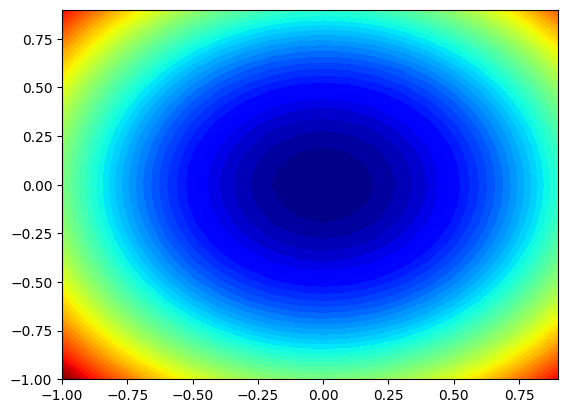

In [ ]:
# Define the bounds of the search space as a NumPy array where each row represents a variable and the columns
# contain the minimum and maximum values for that variable. In this case, the search space is defined for 'x' and 'y'.
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Create an array 'xaxis' that contains evenly spaced values between the minimum and maximum values of 'x' in the search space
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)

# Create an array 'yaxis' that contains evenly spaced values between the minimum and maximum values of 'y' in the search space
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

# Create a grid of 'x' and 'y' values using 'meshgrid' where 'x' values are based on 'xaxis' and 'y' values on 'yaxis'
x, y = meshgrid(xaxis, yaxis)

# Calculate the results by applying the 'objective' function to every combination of 'x' and 'y' in the grid
results = objective(x, y)

# Create a filled contour plot using 'contourf' to visualize the results. It uses the grid 'x' and 'y',
# the 'results' of the objective function, specifies 50 contour levels, and uses the 'jet' colormap for color mapping.
pyplot.contourf(x, y, results, levels=50, cmap='jet')

# Display the contour plot
pyplot.show()


**Observation**

- The observation for the given code is that the contour plot shows a symmetric bowl-shaped pattern, indicating that the objective function has a minimum point at or near the origin (x = 0, y = 0).
- The color intensity in the plot represents the function's values, with darker regions indicating lower values and lighter regions indicating higher values.


# Method-2: Using tensorflow and keras

The code demonstrates how to build, train, and evaluate a simple linear regression model using TensorFlow and Keras with the Adagrad optimizer on a real-world dataset, the California housing dataset.

- We load the California housing dataset from scikit-learn.
- Split the data into training and testing sets.
- Standardize the features using StandardScaler.
- Build a linear regression model with a single output node using Keras.
- Compile the model with the Adagrad optimizer.
- Train the model on the training data.
- Evaluate the model's performance on the test data using mean squared error.

In [5]:
#import the required libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a linear regression model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model with Adagrad optimizer
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
epochs = 10
batch_size = 2
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

ValueError: Argument(s) not recognized: {'momentum': 0.8}

In [4]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error on Test Data: 0.6400331746665872


**Conclusion**

The model is effectively learning from the data, as evidenced by the decreasing loss values. The final Mean Squared Error (MSE) on the test data is as given above. This indicates a reasonable performance for a linear regression model on this dataset.